# A/B Testing Marketing - full analysis project

This notebook shows how I applied the A/B testing method to determine whether an ad or a Public Service Announcement (PSA) is more effective as a marketing strategy for promoting a product. I got the dataset from [Kaggle](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing/code).

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.proportion import proportions_ztest

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the dataset
df = pd.read_csv('marketing_AB.csv')

In [3]:
#See the first 5 rows
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [4]:
#Rename columns
df = df.rename(columns={
    'user id': 'User ID',
    'test group': 'Test Group',
    'converted': 'Converted',
    'total ads': 'Total Ads',
    'most ads day': 'Most Ads Day',
    'most ads hour': 'Most Ads Hour'
})

In [5]:
#Check data types and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   User ID        588101 non-null  int64 
 2   Test Group     588101 non-null  object
 3   Converted      588101 non-null  bool  
 4   Total Ads      588101 non-null  int64 
 5   Most Ads Day   588101 non-null  object
 6   Most Ads Hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [6]:
#Summary stats for numeric columns
df.describe()

,Unnamed: 0,User ID,Total Ads,Most Ads Hour
count,588101.000000,5.881010e+05,588101.000000,588101.000000
mean,294050.000000,1.310692e+06,24.820876,14.469061
std,169770.279667,2.022260e+05,43.715181,4.834634
min,0.000000,9.000000e+05,1.000000,0.000000
25%,147025.000000,1.143190e+06,4.000000,11.000000
50%,294050.000000,1.313725e+06,13.000000,14.000000
75%,441075.000000,1.484088e+06,27.000000,18.000000
max,588100.000000,1.654483e+06,2065.000000,23.000000


## Data Preprocessing

In [7]:
#Drop column "Unnamed: 0"
df = df.drop(columns=['Unnamed: 0'])

In [8]:
#Check for missing values
df.isna().sum()

User ID          0
Test Group       0
Converted        0
Total Ads        0
Most Ads Day     0
Most Ads Hour    0
dtype: int64

In [9]:
#Check for duplicate data
df.duplicated().sum()

0

## Data Visualizations

### 1. What is the distribution of user exposure between the ad and the PSA groups?

In [10]:
df1 = df['Test Group'].value_counts()
df1

Test Group
ad     564577
psa     23524
Name: count, dtype: int64

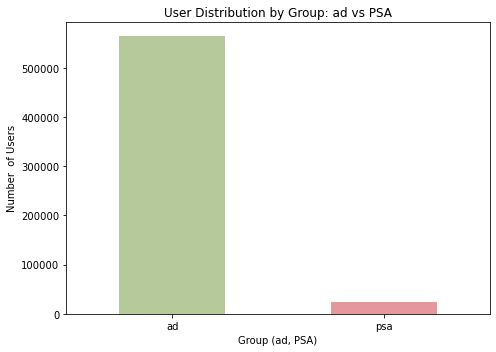

In [11]:
plt.figure(figsize=(7,5))
df1.plot(kind='bar', color=['#b5c99a', '#e5989b'])
plt.title("User Distribution by Group: ad vs PSA")
plt.xlabel("Group (ad, PSA)")
plt.ylabel("Number  of Users")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 2. What is the number of users who made a purchase in each group (ad vs PSA)?

In [12]:
df2 = df.groupby('Test Group')['Converted'].sum().reset_index()
df2

,Test Group,Converted
0,ad,14423
1,psa,420


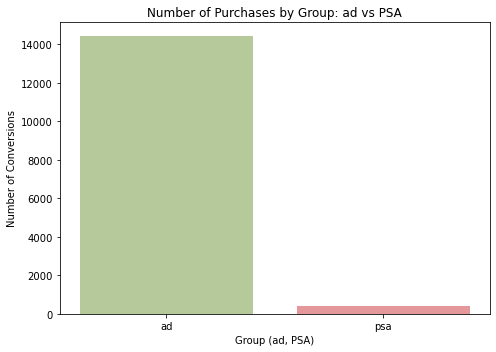

In [13]:
plt.figure(figsize=(7,5))
plt.bar(df2['Test Group'], df2['Converted'], color=['#b5c99a', '#e5989b'])
plt.title("Number of Purchases by Group: ad vs PSA")
plt.xlabel("Group (ad, PSA)")
plt.ylabel("Number of Conversions")
plt.tight_layout()
plt.show()

### 3. Does the ad campaign lead to a higher conversion rata compares to the PSA campaign?

In [14]:
df3 = df.groupby('Test Group')['Converted'].mean().reset_index()
df3

,Test Group,Converted
0,ad,0.025547
1,psa,0.017854


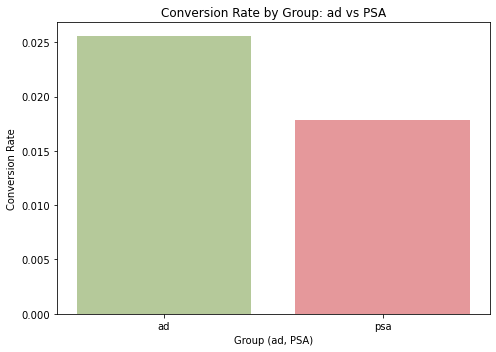

In [15]:
plt.figure(figsize=(7,5))
plt.bar(df3['Test Group'], df3['Converted'], color=['#b5c99a', '#e5989b'])
plt.title("Conversion Rate by Group: ad vs PSA")
plt.xlabel("Group (ad, PSA)")
plt.ylabel("Conversion Rate")
plt.tight_layout()
plt.show()

### 4. Which days had the highest number of impressions for the ad and PSA groups?

In [16]:
df4 = df.groupby(['Most Ads Day', 'Test Group']).size().unstack().fillna(0)
df4

Test Group,ad,psa
Most Ads Day,,
Friday,88805,3803
Monday,83571,3502
Saturday,78802,2858
Sunday,82332,3059
Thursday,79077,3905
Tuesday,74572,2907
Wednesday,77418,3490


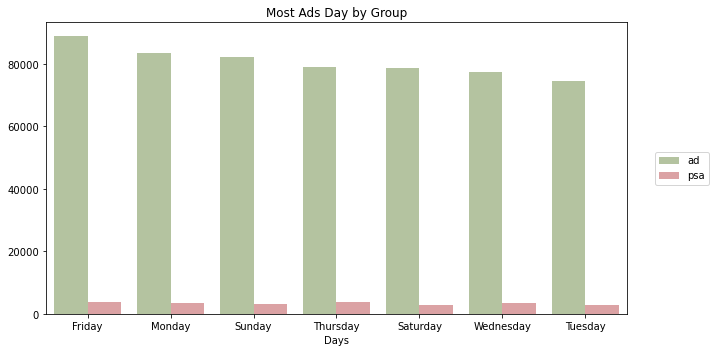

In [17]:
df5 = df['Most Ads Day'].value_counts().sort_values(ascending=False).index

#Plot
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Most Ads Day', hue='Test Group', order=df5, palette=['#b5c99a', '#e5989b'])
plt.title("Most Ads Day by Group")
plt.xlabel("Days")
plt.ylabel("")
plt.legend(loc='center right', bbox_to_anchor=(1.15, 0.5))
plt.tight_layout()
plt.show()

### 5. Which hour had the highest number of impressions for the ad and the PSA group?

In [18]:
df6 = df.groupby(['Most Ads Hour', 'Test Group']).size().unstack().fillna(0)
df6

Test Group,ad,psa
Most Ads Hour,,
0,5309,227
1,4615,187
2,5152,181
3,2590,89
4,694,28
5,742,23
6,1985,83
7,6168,237
8,16968,659


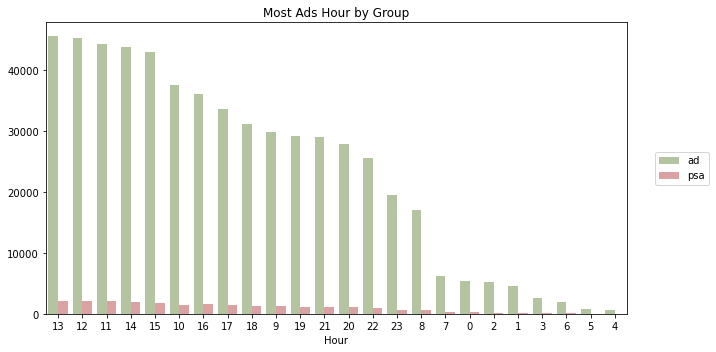

In [19]:
df7 = df['Most Ads Hour'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Most Ads Hour', hue='Test Group', order=df7, palette=['#b5c99a', '#e5989b'])
plt.title("Most Ads Hour by Group")
plt.xlabel("Hour")
plt.ylabel("")
plt.legend(loc='center right', bbox_to_anchor=(1.15, 0.5))
plt.tight_layout()
plt.show()

## Exploratory Data Analysis (EDA)

### 1. Would the campaign be successful?
Hypothesis:

Null hypothesis (H0):

The conversion rate of the ad group is equal to the conversion rate of the PSA group. (There is no significant difference, the ad may not be effective)

Alternative hypothesis (H1):

The conversion rate of the ad group is not equal to the conversion rate of the PSA group. (There is a significant difference, the ad may be effective)

Interpretation:

- If the p-value < 0.05, we conclude that there is a significant difference in conversion rates, meaning the campaign is likely successful.

- If the p-value ≥ 0.05, we conclude that the difference is not statistically significant, meaning the campaign might not be effective.

In [20]:
#Total number of converted users in each group
converted = df.groupby('Test Group')['Converted'].sum().values

#Total number of users in each group
total = df.groupby('Test Group')['Converted'].count().values

#Z-test
z_stat, p_value = proportions_ztest(count=converted, nobs=total)

#The results
print(f"Z-statistic: {z_stat:.4f}")
print(f"p-value: {p_value:.4f}")

Z-statistic: 7.3701
p-value: 0.0000


Based on the results of the analysis, the p-value is less than 0.05, which indicates a statistically significant difference in conversion rates between users who saw the ad and those who saw the PSA. This suggests that the ad campaign can be considered successful.

### 2. If the campaign was successful, how much of that success could be atributed to the ads?

To determine how much of the campaign's success can be attributed to the ads, I'll use lift to measure how much the ad improved the results. How does lift work? Lift measures the percentage increase in conversion rate between the ad group and the PSA group, showing how much impact the ad had.

In [21]:
#Lift calculation
df8 = df.groupby('Test Group')['Converted'].mean()

conversionrate_ad = df8['ad']
conversionrate_psa = df8['psa']

lift = (conversionrate_ad - conversionrate_psa)/conversionrate_psa
lift_percentage = lift * 100

print(f"Lift: {lift_percentage:.2f}%")

Lift: 43.09%


A lift of 43.09% means that the ad campaign was the main factor driving the campaign's overall success, contributing to a 43.09% relative increase in conversions.

Given that the statistical test showed a significant result, it confirms that the ad played a key role in this success. The ad clearly had a strong impact in getting more users to take desired action, such as making a purchase or signing up.